In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

ModuleNotFoundError: No module named 'pandas'

# Importando o nosso DataFrame

In [ ]:
# Primeiro vamos contextualizar as informações do dataset
''' O conjunto de dados conhecido como California Housing reúne informações sobre os preços de imóveis por bairro no estado da Califórnia.
Entre os atributos disponíveis, estão a localização geográfica (longitude e latitude),
a média do número de quartos por residência, e o preço médio dos imóveis no bairro, que serve como rótulo'''



dataset_train = pd.read_csv('sample_data/california_housing_train.csv')
dataset_test = pd.read_csv('sample_data/california_housing_test.csv')
dataset = pd.concat([dataset_train, dataset_test], axis=0)

NameError: name 'pd' is not defined

In [ ]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# Usando housing_data como nome da variável pra ser menos genérico
#é mais significativo assim.

housing_data = pd.read_csv('/content/Housing.csv')
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0, 0.5, 'Latitude')

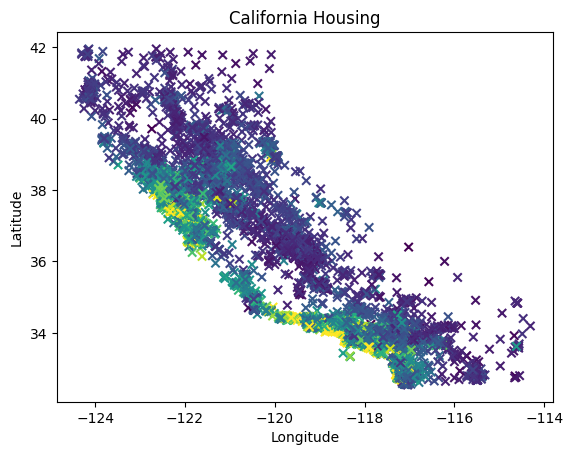

In [ ]:
# Por ser um estado litorâneo, geralmente, as residências mais próximas da praia são mais caras
# Como mostrado no gráfico abaixo, quanto mais próximo da praia, mais valiosa é a casa(verde e amarelo)
plt.scatter(dataset['longitude'], dataset['latitude'], marker='x', c=dataset['median_house_value'])
plt.title('California Housing')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

<Axes: >

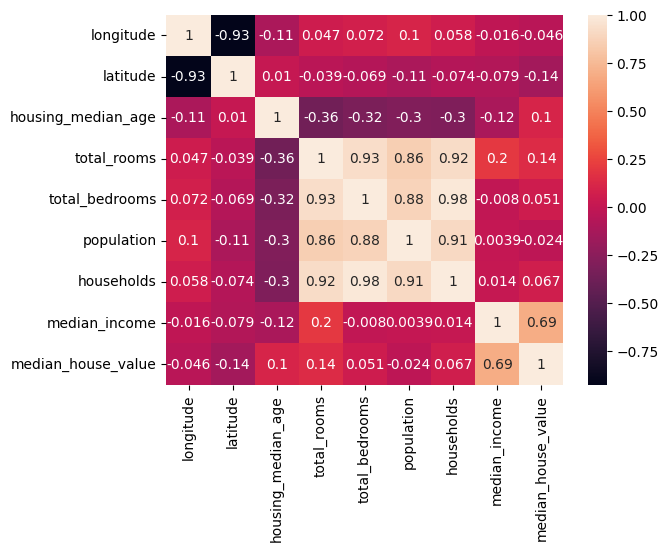

In [ ]:
# é um mapa de calor (heatmap) que ilustra as correlações entre as variáveis do dataset.
'''Tons claros (próximos de 1 ou -1): Forte correlação.
Tons escuros (próximos de 0): Correlação fraca ou inexistente.'''

'''Se o heatmap mostra que a variável A tem uma correlação de 0.85 com B,
isso indica que essas variáveis têm uma forte relação positiva (à medida que A aumenta, B também tende a aumentar).
Já uma correlação de -0.90 entre C e D significa que elas possuem uma relação negativa forte (se C aumenta, D tende a diminuir).'''

from seaborn import heatmap

heatmap(dataset.corr(), annot=True)

Plotando mais algumas informações do DataSet

<Axes: >

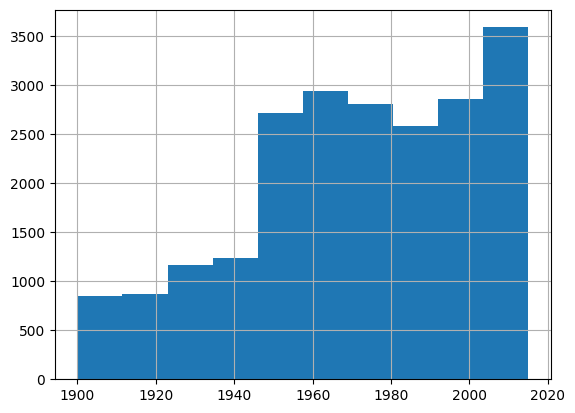

In [ ]:
housing_data["yr_built"].hist()

<Axes: xlabel='bathrooms', ylabel='bedrooms'>

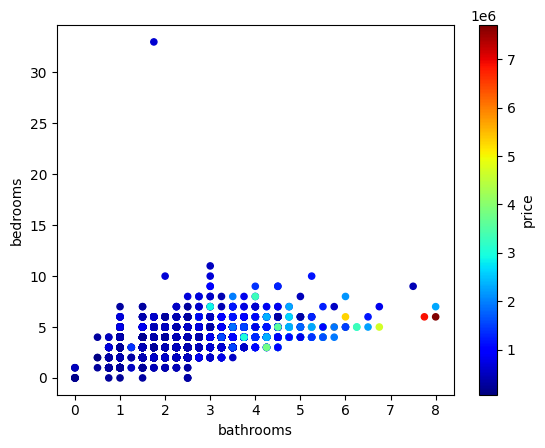

In [ ]:
housing_data.plot.scatter(x = "bathrooms", y = "bedrooms", c = "price", colormap = "jet")

<Axes: xlabel='sqft_living', ylabel='price'>

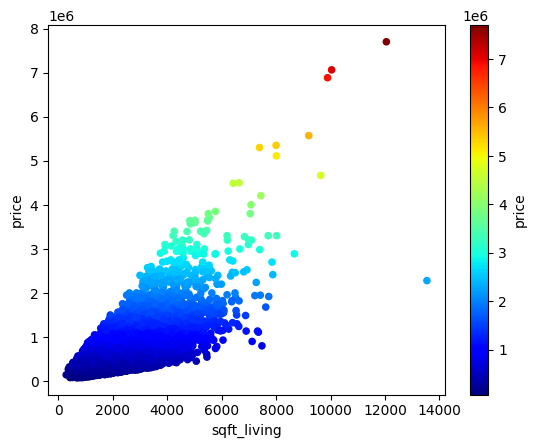

In [ ]:
housing_data.plot.scatter(x='sqft_living', y='price', c = "price", colormap = "jet")

<Axes: xlabel='long', ylabel='lat'>

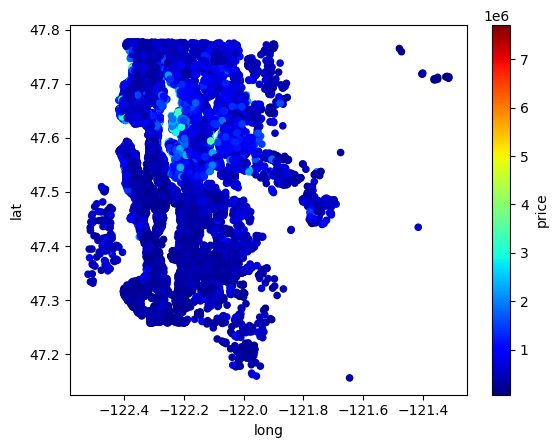

In [ ]:
housing_data.plot.scatter(x='long', y='lat', c = "price", colormap = "jet")

# Analisando numericamente nossos dados

In [ ]:
#Olhando os dados das 15 primeiras casas no DataSet
housing_data.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Treinando o modelo

In [ ]:
#Criando uma função para achar o Mean Absolute Error

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    prediction_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, prediction_val)
    return mae

Aqui é criado uma lista de parâmetros a fim de se obter uma comparação dos erros obtidos quando se muda as variáveis com as quais o modelo trabalha para fazer a predição

In [ ]:
PARAMETROS = {
    ("yr_built", ): float("inf"),
    ("bedrooms", "bathrooms"): float("inf"),
    ("bedrooms", "bathrooms", "sqft_living"): float("inf"),
    ("bedrooms", "bathrooms", "lat", "long"): float("inf"),
    ('bedrooms', 'bathrooms', 'yr_built', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'floors', 'sqft_basement', 'sqft_living15', 'sqft_lot15'): float("inf"),
    ('bedrooms', 'bathrooms', 'yr_renovated', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'floors', 'sqft_basement', 'sqft_living15', 'sqft_lot15'): float("inf"),

}

In [ ]:
for lista_de_parametros in PARAMETROS:

    # Criando o dado a ser previsto
    y = housing_data.price

    #Para cada iteração estamos mudando os parâmetros
    X = housing_data[[feature for feature in lista_de_parametros]]

    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

    #Criamos uma lista com valores de max_leaf_nodes para serem comparados
    #Nosso objetivo é achar o valor que minimiza o erro
    lista_de_candidatos = list(range(10, 2_000, 5))

    #O erro inicialmente é um número muito grande
    erro = float("inf")

    for candidato in lista_de_candidatos:

        erro_do_candidato = get_mae(candidato, train_X, val_X, train_y, val_y)

        if erro_do_candidato < erro:
            erro = erro_do_candidato
            melhor_arvore = candidato


    print(lista_de_parametros, melhor_arvore, ":: MAE =", erro)

('yr_built',) 15 :: MAE = 232666.2507042988
('bedrooms', 'bathrooms') 15 :: MAE = 197177.39246664933
('bedrooms', 'bathrooms', 'sqft_living') 30 :: MAE = 171875.2838100844
('bedrooms', 'bathrooms', 'lat', 'long') 950 :: MAE = 123913.53844357027
('bedrooms', 'bathrooms', 'yr_built', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'floors', 'sqft_basement', 'sqft_living15', 'sqft_lot15') 340 :: MAE = 137356.61831173793
('bedrooms', 'bathrooms', 'yr_renovated', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'floors', 'sqft_basement', 'sqft_living15', 'sqft_lot15') 270 :: MAE = 144109.08696865983


Agora que temos uma comparação dos erros, podemos escolher os parâmetros que geraram menos erros e aplicá-los sobre todos os dados a fim de se obter uma predição mais certeira

Aplicando o modelo de Decision Tree

In [ ]:
#Criando os dados de features que gerou o segundo menor erro

features = ['bedrooms', 'bathrooms', 'yr_built', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'floors', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

X = housing_data[features]

#Aplicando o modelo na totalidade dos dados

modelo_final_dt = DecisionTreeRegressor(max_leaf_nodes=340)
modelo_final_dt.fit(X, y)

predicted_home_prices = modelo_final_dt.predict(X)
mean_absolute_error(y, predicted_home_prices)


108680.4581266811

Vamos apresentar uma tabela comparando o valor real da casa, à esquerda, com a predição do modelo, à direita.

In [ ]:
print(np.vstack((y, predicted_home_prices)).T)
print(f'\nMAPE = {mean_absolute_percentage_error(y, predicted_home_prices)}')

[[231300.         289499.23900879]
 [538000.         599728.09448819]
 [180000.         388470.88541667]
 ...
 [402101.         332630.73300971]
 [400000.         435715.54595444]
 [325000.         332630.73300971]]

MAPE = 0.2440503929703485


In [ ]:
#Criando os dados de features que gerou o menor erro

features = ["bedrooms", "bathrooms", "lat", "long"]

#Aplicando o modelo na totalidade dos dados

modelo_final_dt = DecisionTreeRegressor(max_leaf_nodes=950)
modelo_final_dt.fit(X, y)

predicted_home_prices = modelo_final_dt.predict(X)
mean_absolute_error(y, predicted_home_prices)

88909.65128082618

In [ ]:
print(np.vstack((y, predicted_home_prices)).T)
print(f'\nMAPE = {mean_absolute_percentage_error(y, predicted_home_prices)}')

[[231300.         274786.07451565]
 [538000.         685208.49056604]
 [180000.         312674.44444444]
 ...
 [402101.         320054.28834356]
 [400000.         455526.63905325]
 [325000.         320054.28834356]]

MAPE = 0.20928534617339614


Aplicando o modelo Random Forest

In [ ]:
#Criando os dados de features que gerou o segundo menor erro

features = ['bedrooms', 'bathrooms', 'yr_built', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'floors', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

X = housing_data[features]

#Aplicando o modelo na totalidade dos dados

modelo_final_rf = RandomForestRegressor()
modelo_final_rf.fit(X, y)

predicted_home_prices = modelo_final_rf.predict(X)
mean_absolute_error(y, predicted_home_prices)


43804.84857682766

In [ ]:
print(np.vstack((y, predicted_home_prices)).T)
print(f'\nMAPE = {mean_absolute_percentage_error(y, predicted_home_prices)}')

[[231300.   269971.5 ]
 [538000.   553322.5 ]
 [180000.   279158.  ]
 ...
 [402101.   375422.61]
 [400000.   397796.9 ]
 [325000.   339757.58]]

MAPE = 0.08919041865145791


In [ ]:
#Criando os dados de features que gerou o menor erro

features = ["bedrooms", "bathrooms", "lat", "long"]

#Aplicando o modelo na totalidade dos dados

modelo_final = RandomForestRegressor()
modelo_final.fit(X, y)

predicted_home_prices = modelo_final.predict(X)
mean_absolute_error(y, predicted_home_prices)

43661.230482587875

In [ ]:
print(np.vstack((y, predicted_home_prices)).T)
print(f'\nMAPE = {mean_absolute_percentage_error(y, predicted_home_prices)}')

[[231300.   284807.82]
 [538000.   591381.44]
 [180000.   252564.25]
 ...
 [402101.   388477.6 ]
 [400000.   394809.  ]
 [325000.   350110.08]]

MAPE = 0.08905907506987193


In [ ]:
#Criando os dados de features com todos os parâmetros disponíveis

features = ['bedrooms', 'bathrooms', 'yr_built', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'floors', 'sqft_basement', 'sqft_living15', 'sqft_lot15', "waterfront", "view", "condition","yr_renovated", "zipcode", "lat", "long"]

X = housing_data[features]

#Aplicando o modelo na totalidade dos dados

modelo_final_rf = RandomForestRegressor()
modelo_final_rf.fit(X, y)

predicted_home_prices = modelo_final_rf.predict(X)
mean_absolute_error(y, predicted_home_prices)


25741.547176984903

In [ ]:
print(np.vstack((y, predicted_home_prices)).T)
print(f'\nMAPE = {mean_absolute_percentage_error(y, predicted_home_prices)}')

[[231300.   239724.1 ]
 [538000.   505928.44]
 [180000.   223918.5 ]
 ...
 [402101.   371799.08]
 [400000.   399336.58]
 [325000.   338134.12]]

MAPE = 0.0490925099285476


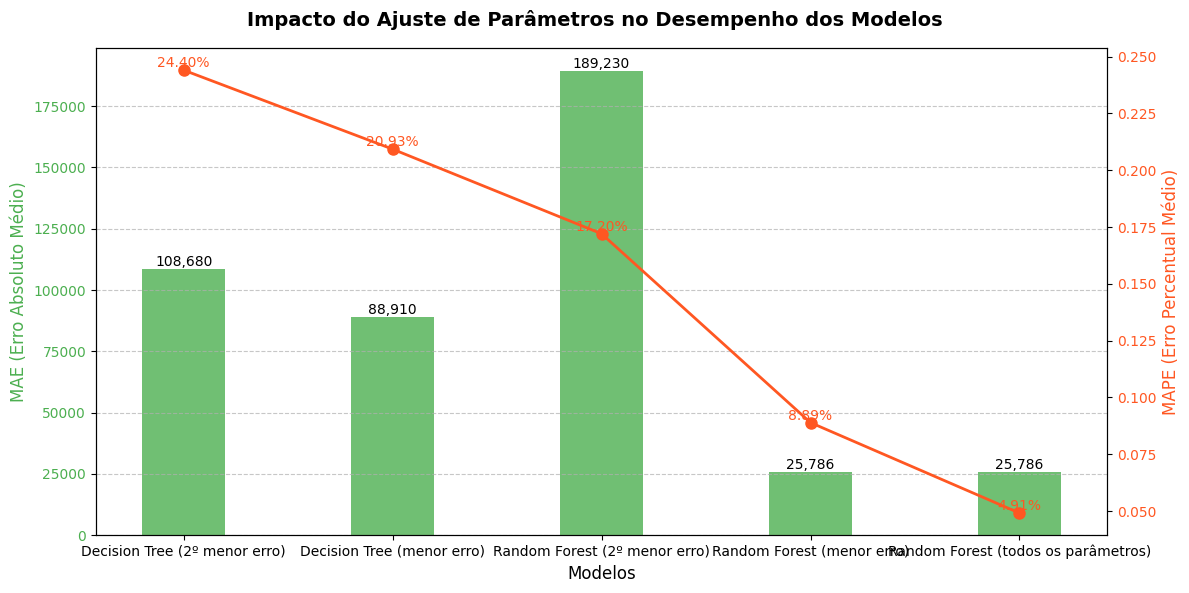

In [ ]:
modelos = [
    "Decision Tree (2º menor erro)",
    "Decision Tree (menor erro)",
    "Random Forest (2º menor erro)",
    "Random Forest (menor erro)",
    "Random Forest (todos os parâmetros)"
]

mae = [
    108680.46,  # Decision Tree (2º menor erro)
    88909.65,   # Decision Tree (menor erro)
    189229.56,  # Random Forest (2º menor erro)
    25786.35,   # Random Forest (menor erro)
    25786.35    # Random Forest (todos os parâmetros)
]

mape = [
    0.24405,    # Decision Tree (2º menor erro)
    0.20928,    # Decision Tree (menor erro)
    0.17203,    # Random Forest (2º menor erro)
    0.08892,    # Random Forest (menor erro)
    0.04910     # Random Forest (todos os parâmetros)
]

# Configuração do gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de MAE
bar_width = 0.4
positions = np.arange(len(modelos))
bars = ax1.bar(positions, mae, bar_width, color='#4caf50', alpha=0.8, label='MAE')

# Adicionar rótulos de valor no topo das barras
for bar in bars:
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center', va='bottom', fontsize=10
    )

ax1.set_xlabel('Modelos', fontsize=12)
ax1.set_ylabel('MAE (Erro Absoluto Médio)', fontsize=12, color='#4caf50')
ax1.tick_params(axis='y', labelcolor='#4caf50')

# Gráfico de MAPE (eixo secundário)
ax2 = ax1.twinx()
line = ax2.plot(positions, mape, color='#ff5722', marker='o', markersize=8, linewidth=2, label='MAPE')

#Adicionar rótulos de valor nos pontos da linha
for i, val in enumerate(mape):
    ax2.text(
        positions[i],
        val,
        f'{val:.2%}',
        ha='center', va='bottom', fontsize=10, color='#ff5722'
    )

ax2.set_ylabel('MAPE (Erro Percentual Médio)', fontsize=12, color='#ff5722')
ax2.tick_params(axis='y', labelcolor='#ff5722')


plt.xticks(positions, modelos, rotation=30, ha='right', fontsize=10)

#Título e legendas
fig.suptitle('Impacto do Ajuste de Parâmetros no Desempenho dos Modelos', fontsize=14, weight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()

#Exibir o gráfico
plt.show()